In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

from geopandas import GeoDataFrame
import pandas as pd
import json

In [42]:
## [국가공간데이터포털]행정구역시군구_경계 서울시
link_data = gpd.read_file('./data/서울시 지도/LARD_ADM_SECT_SGG_서울/LARD_ADM_SECT_SGG_11.shp', encoding='utf-8')
link_data2 = gpd.read_file('./data/서울시 지도/Z_KAIS_TL_SPRD_MANAGE_서울/Z_KAIS_TL_SPRD_MANAGE_11000.shp', encoding='utf-8')
link_data3 = gpd.read_file('./data/서울시 지도/Z_SOP_BND_ADM_DONG_PG/Z_SOP_BND_ADM_DONG_PG.shp', encoding='utf-8')
# [국가공간정보포털]행정구역_읍면동(법정동) 서울시
# http://data.nsdi.go.kr/dataset/15145
link_data4 = gpd.read_file('./data/서울시 지도/LSMD_ADM_SECT_UMD_서울/LSMD_ADM_SECT_UMD_11.shp', encoding='utf-8')

# [서울시 열린 데이터광장]서울시 자동차 전용도로 위치정보 (좌표계: GRS80)
link_data5 = gpd.read_file('./data/서울시 지도/TL_SPRD_MTRWY/TL_SPRD_MTRWY.shp', encoding='utf-8')

# 행정동 shp qgis사용 변경한 geojson
dong = gpd.read_file('./data/서울시 지도/QGIS/dong.geojson', encoding='utf-8')


In [4]:
link_data.head()


ADM_SECT_C                               SGG_NM SGG_OID COL_ADM_SE  GID  \
0      11440          b'\xb8\xb6\xc6\xf7\xb1\xb8'    None      11440  136   
1      11410  b'\xbc\xad\xb4\xeb\xb9\xae\xb1\xb8'    None      11410  137   
2      11380          b'\xc0\xba\xc6\xf2\xb1\xb8'    None      11380  138   
3      11350          b'\xb3\xeb\xbf\xf8\xb1\xb8'    None      11350  139   
4      11320          b'\xb5\xb5\xba\xc0\xb1\xb8'    None      11320  140   

                                            geometry  
0  POLYGON ((946044.003 1954091.842, 946130.932 1...  
1  POLYGON ((951688.128 1956065.438, 951687.623 1...  
2  POLYGON ((951637.459 1961851.741, 951649.936 1...  
3  POLYGON ((965666.497 1959953.109, 965671.187 1...  
4  POLYGON ((957223.856 1961199.503, 957195.780 1...

In [24]:
plt.rcParams['figure.figsize']=(30,60)


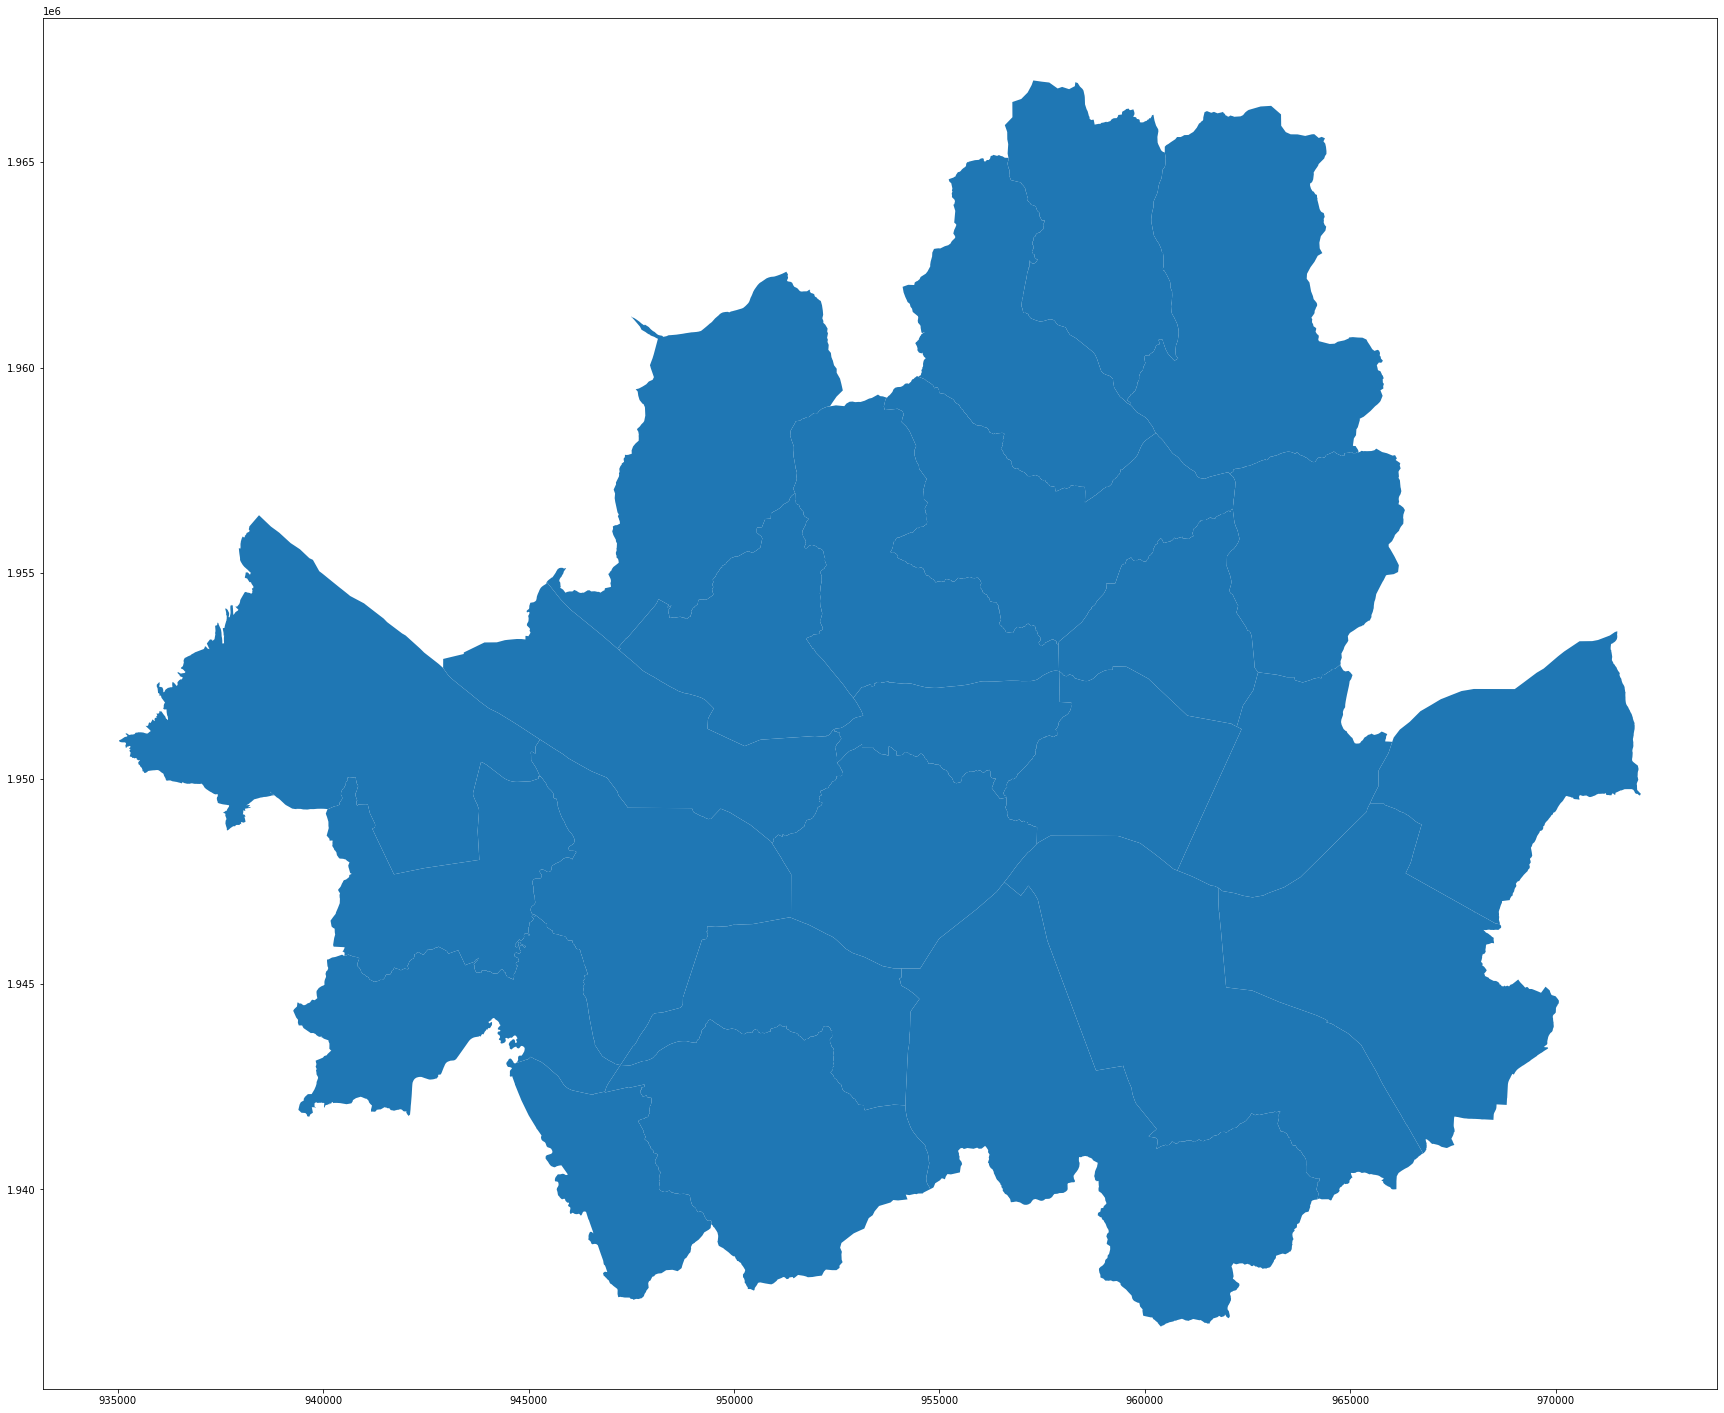

In [25]:
link_data.plot()
plt.show()

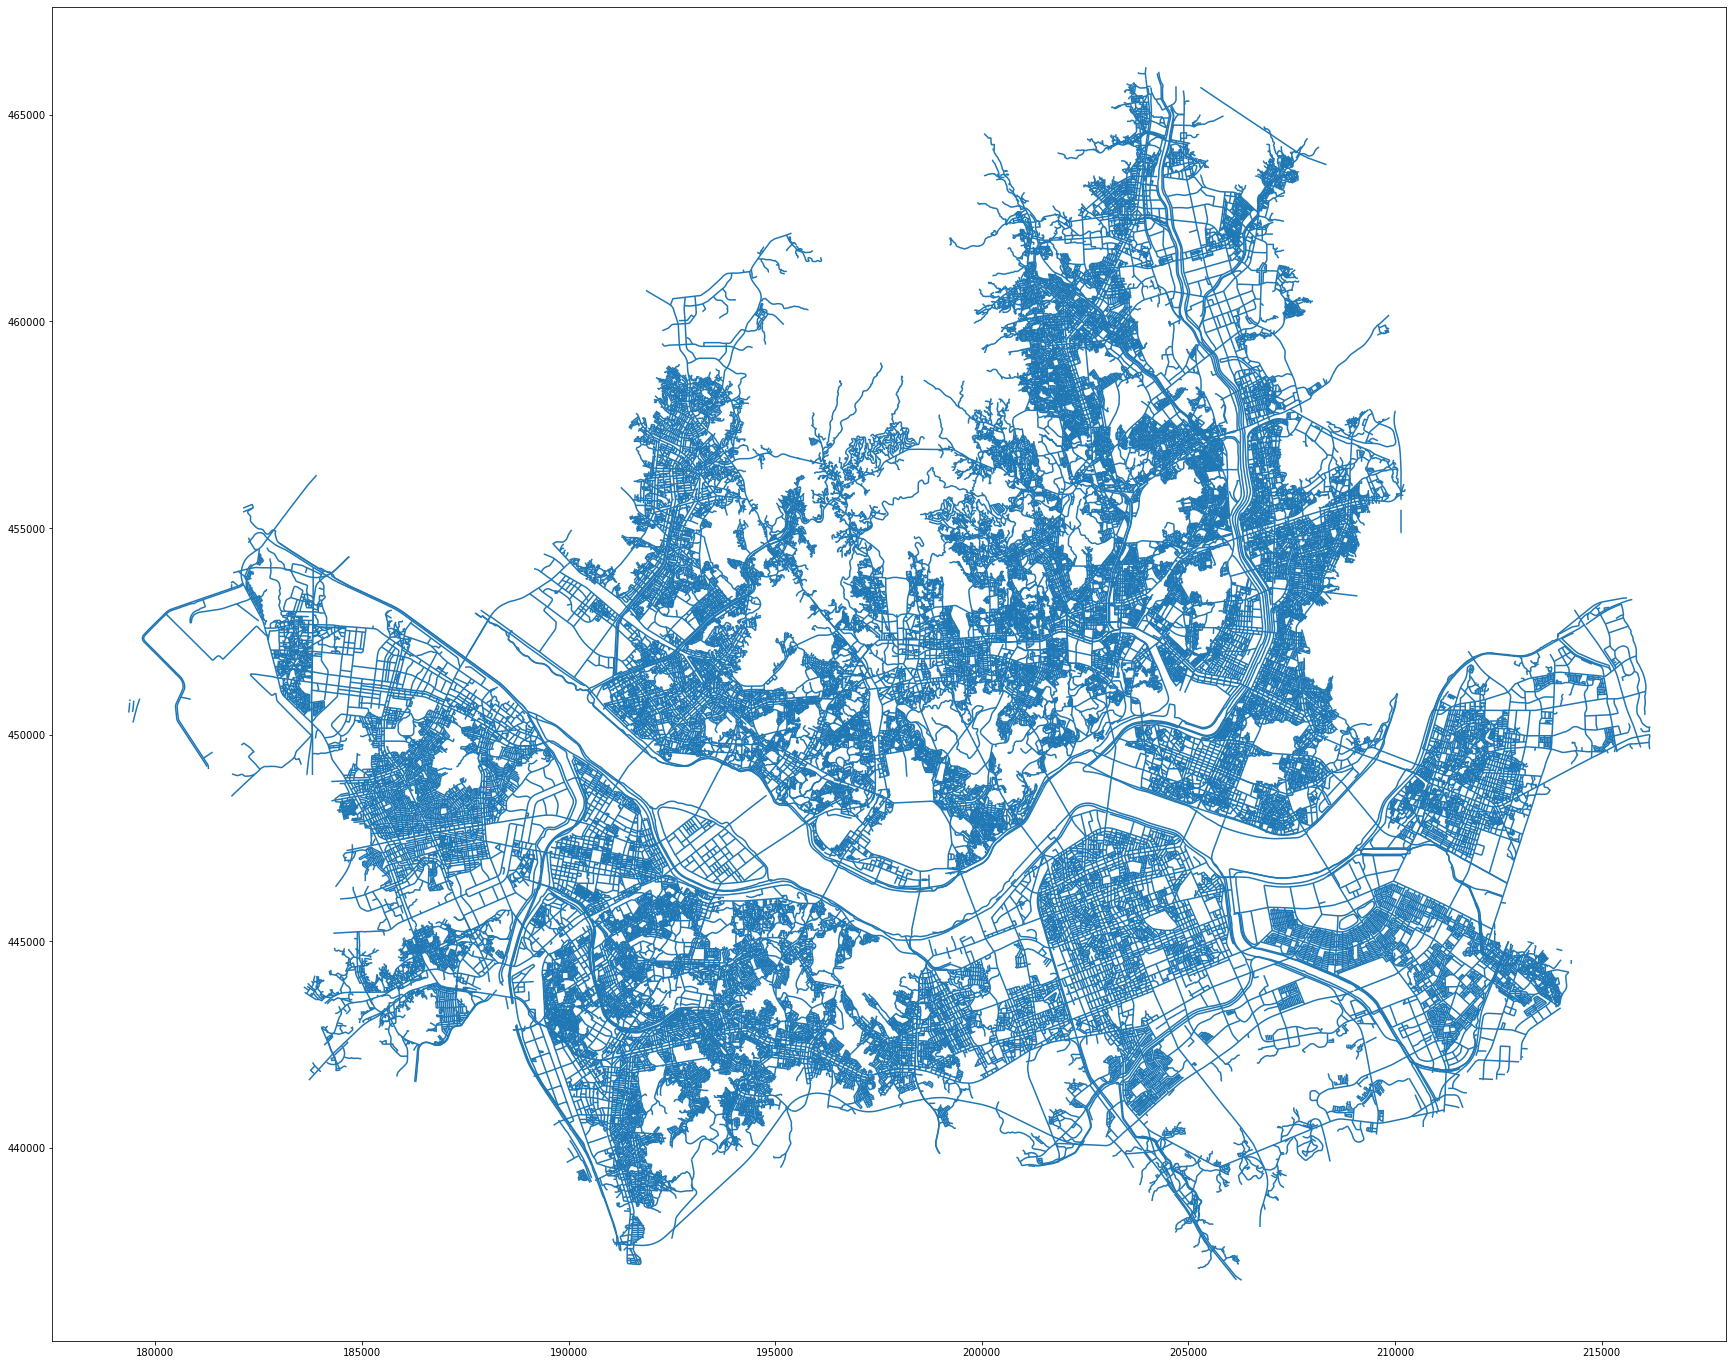

In [26]:
link_data2.plot()
plt.show()

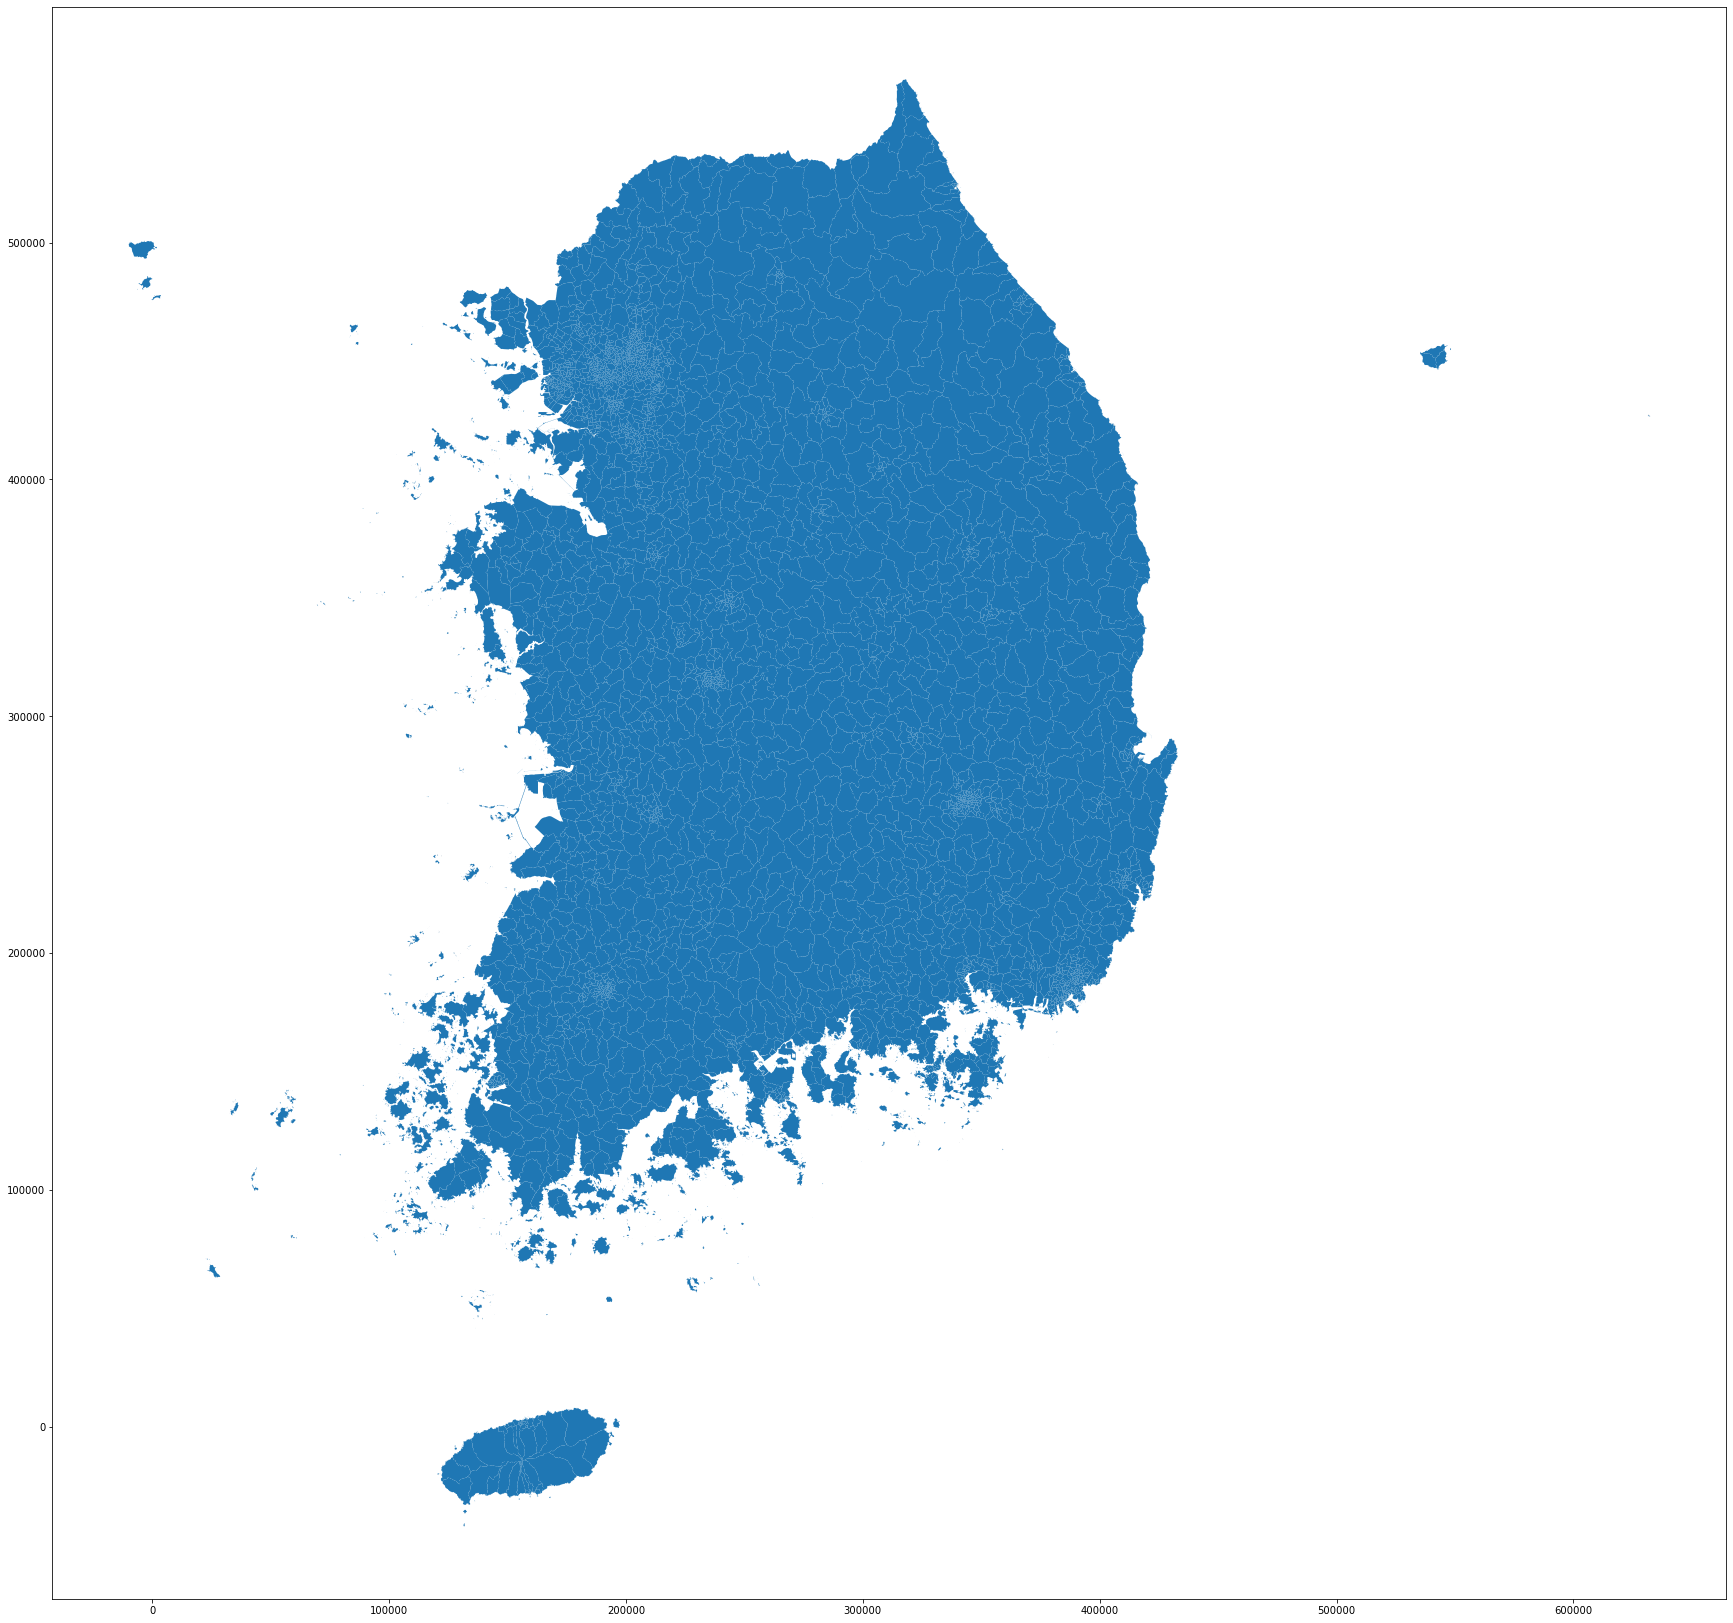

In [27]:
link_data3.plot()
plt.show()

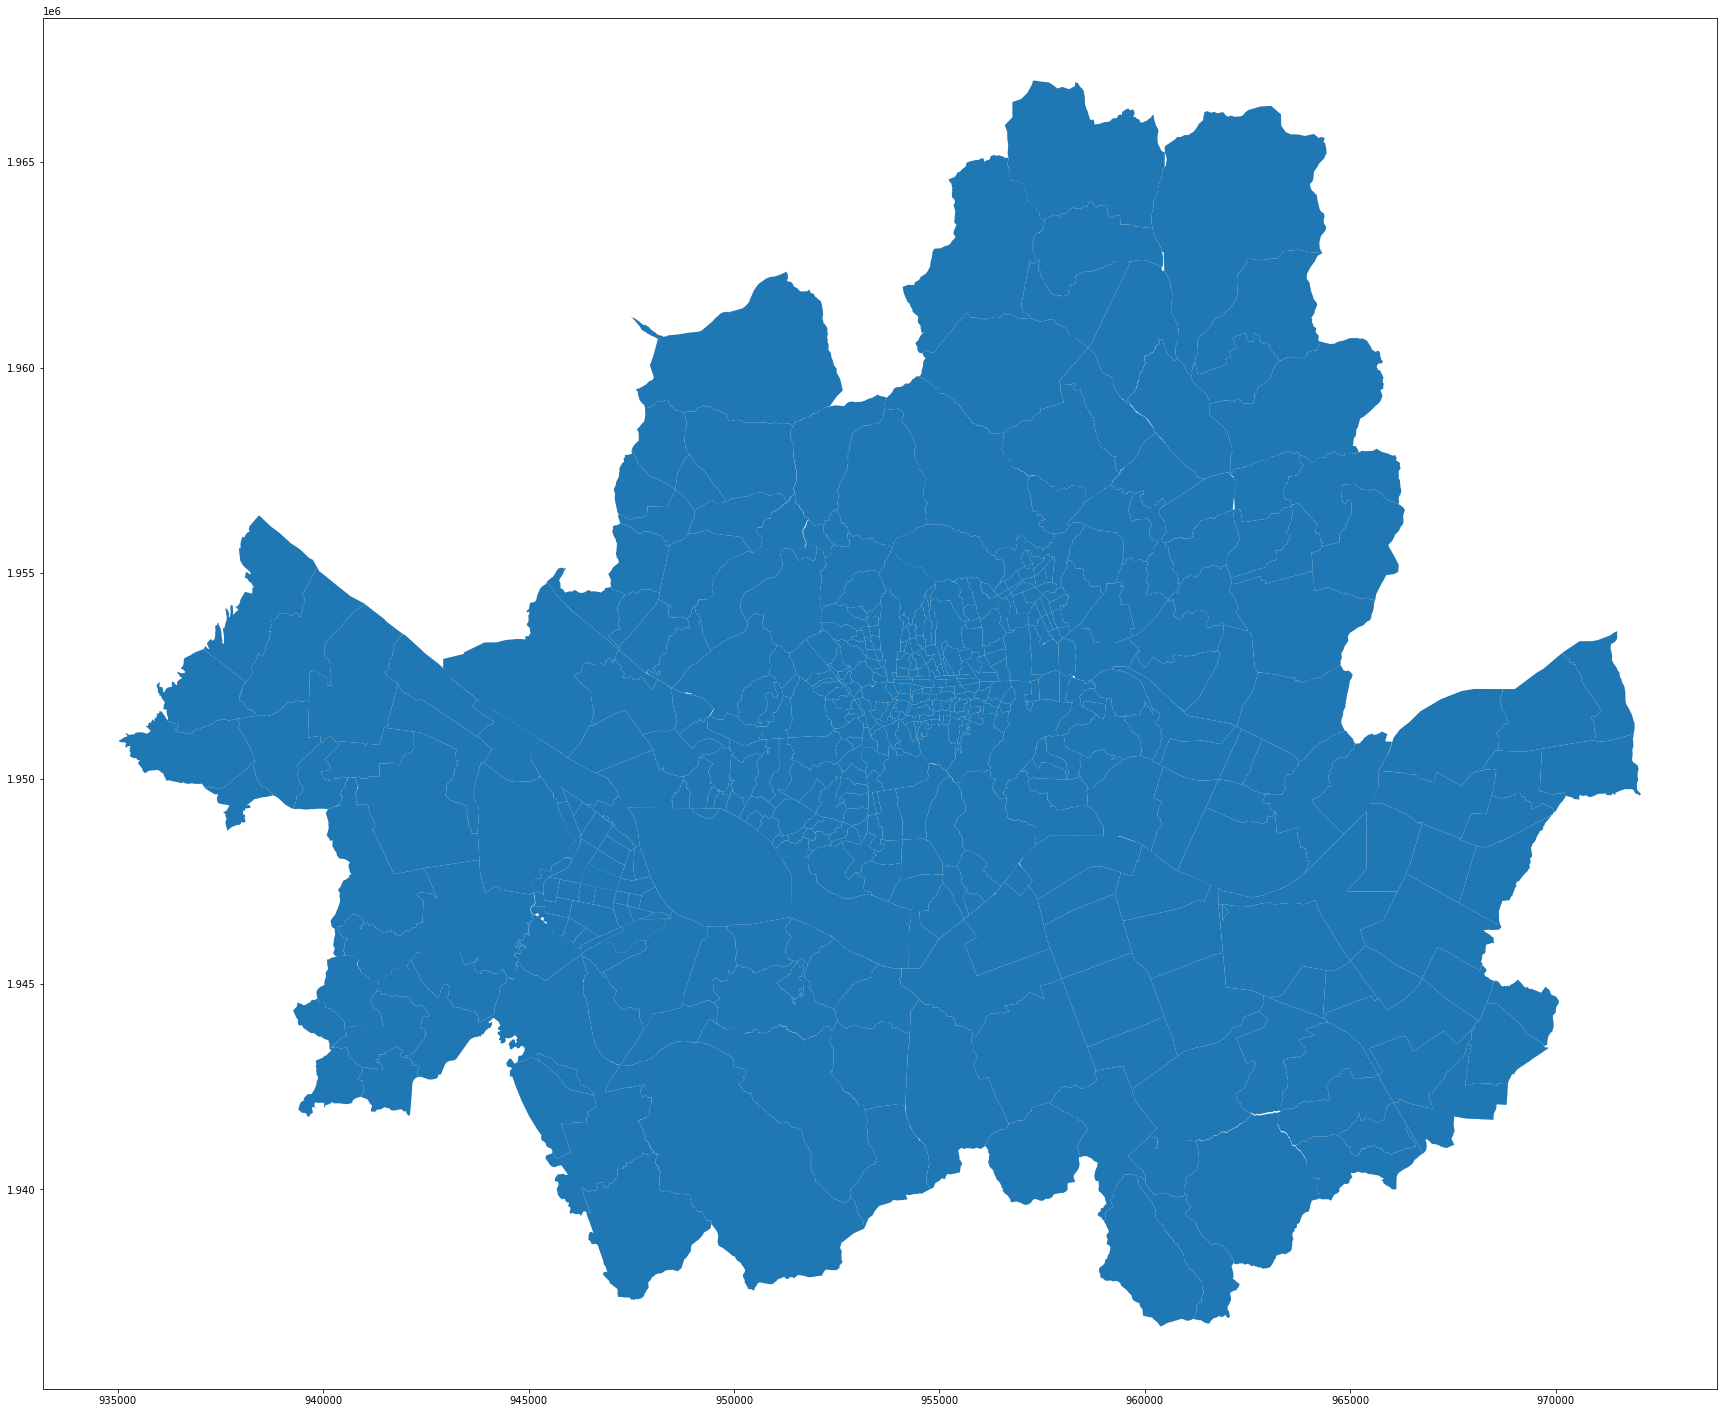

In [28]:
link_data4.plot()
plt.show()

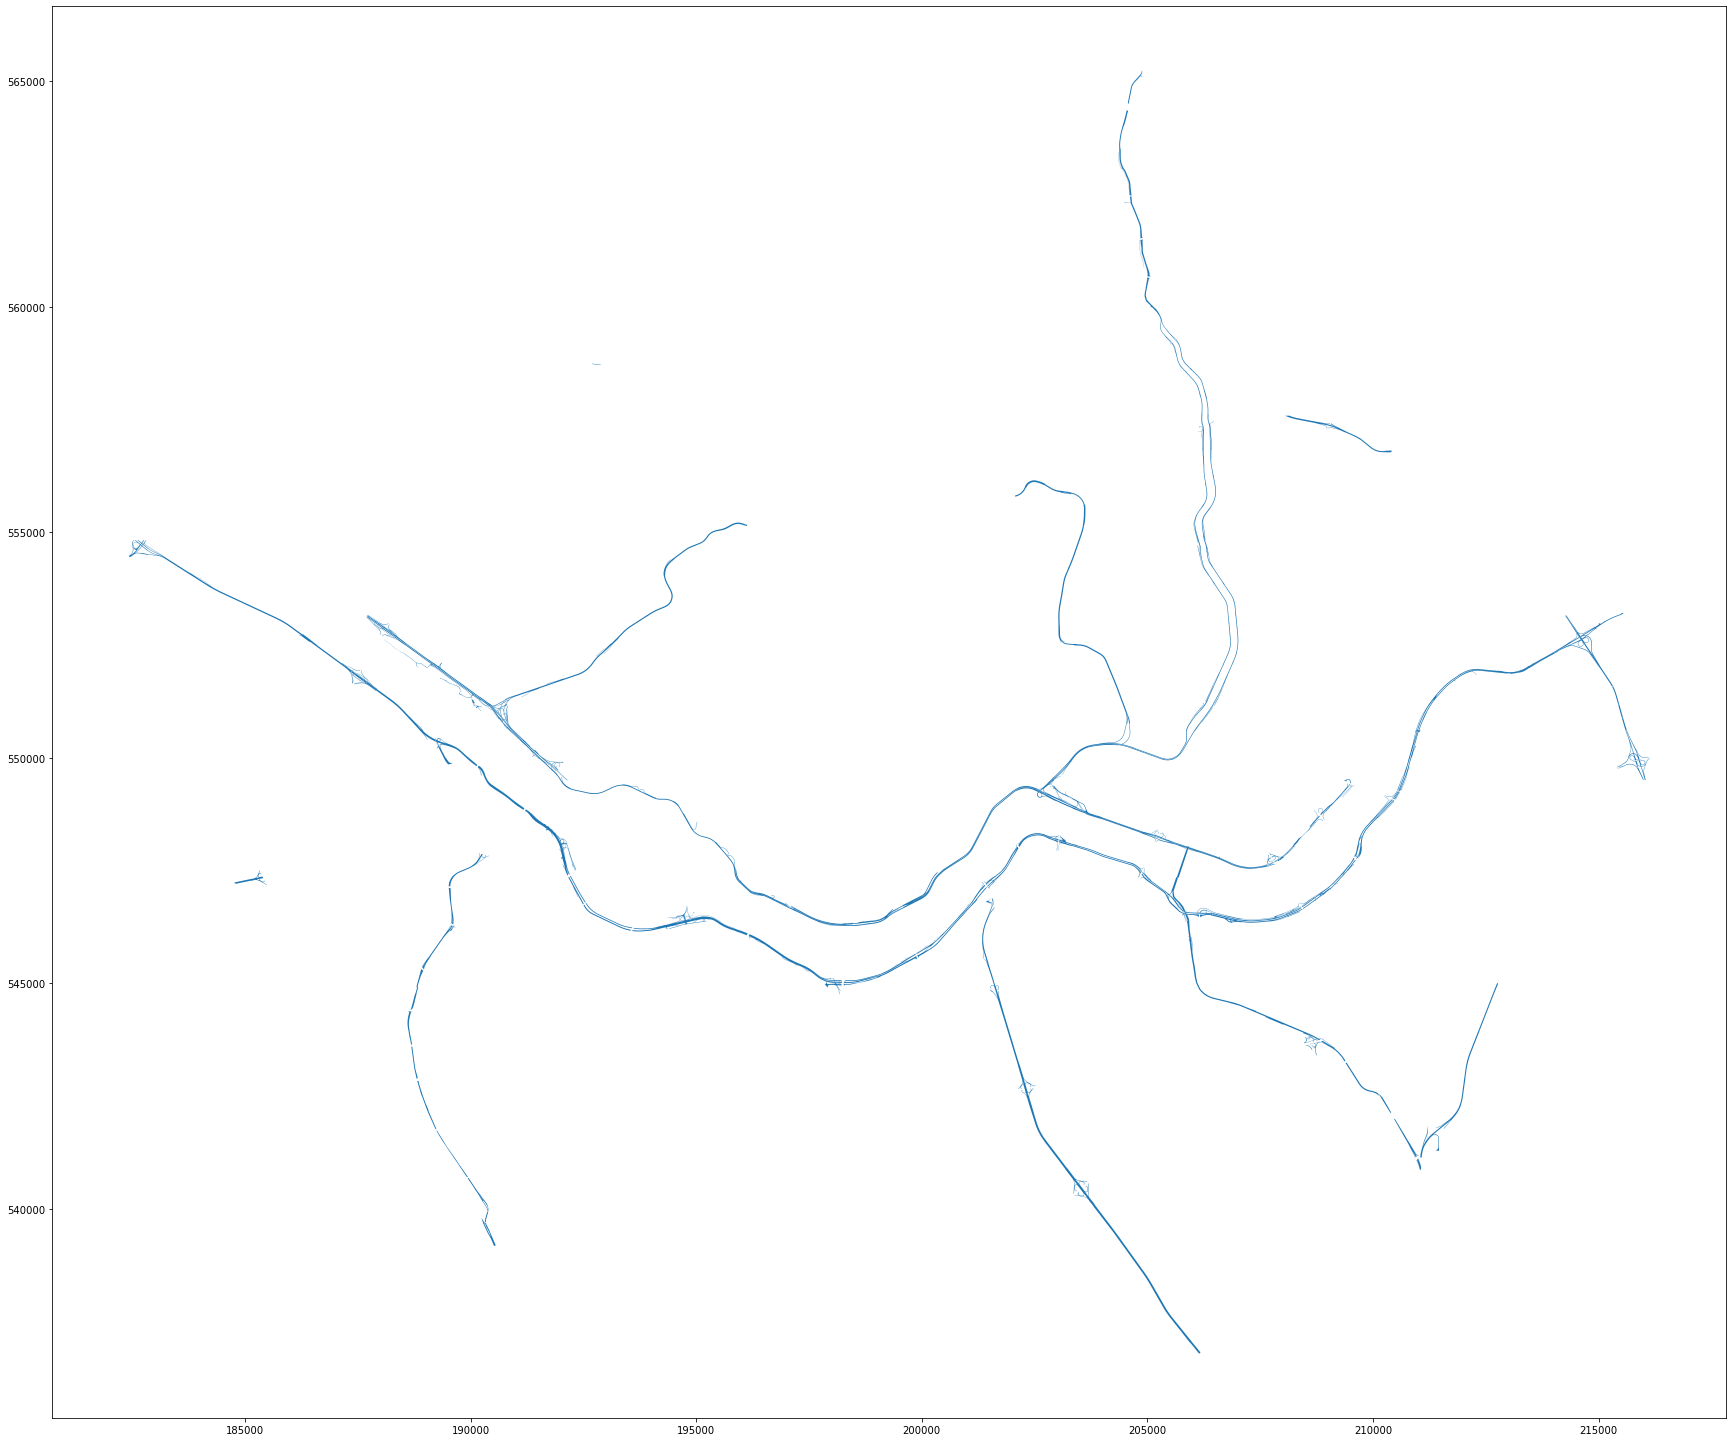

In [29]:
link_data5.plot()
plt.show()

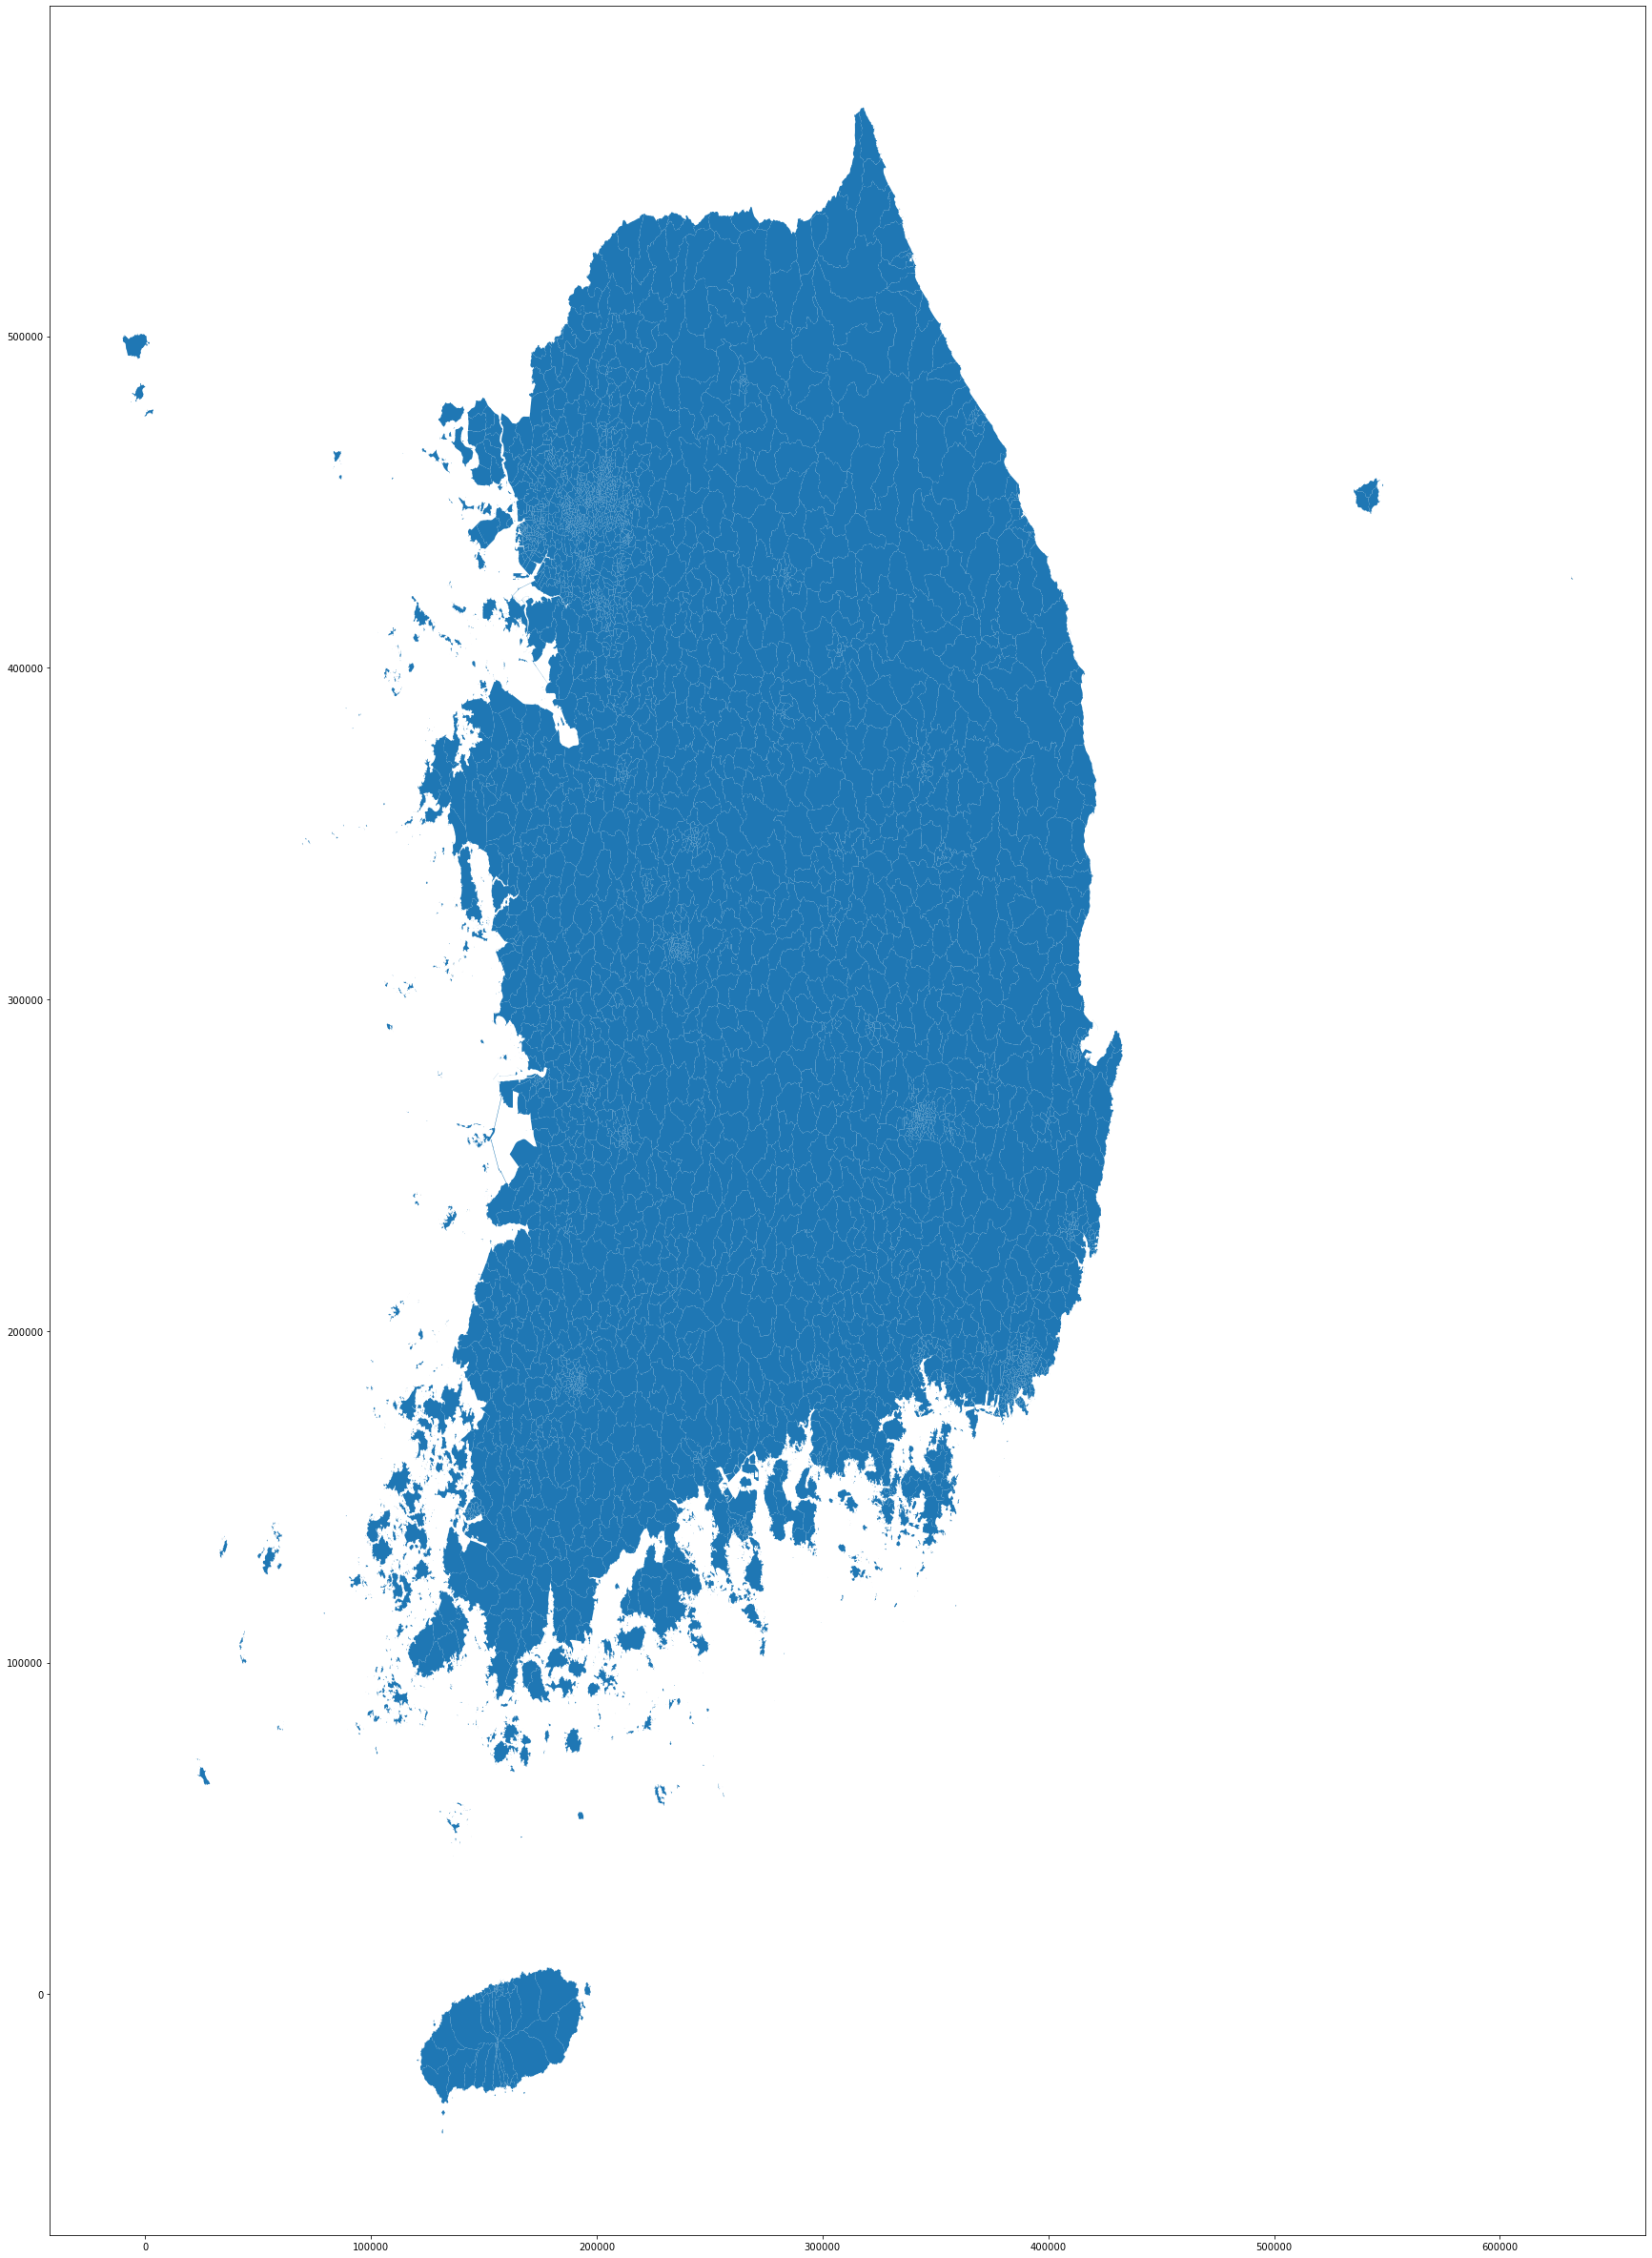

In [43]:
dong.plot()
plt.show()

## geojson 파일 읽기

In [30]:
geo = gpd.read_file("./data/서울시 지도/HangJeongDong_ver20220701.geojson")
data_local = pd.read_csv("./data/행정동 단위 서울 생활인구/LOCAL_PEOPLE_DONG_202208.csv",encoding='utf-8')
data_foreigner_long = pd.read_csv("./data/행정동 단위 서울 생활인구/LONG_FOREIGNER_20220924.csv",encoding='euc-kr')
data_foreigner_temp = pd.read_csv("./data/행정동 단위 서울 생활인구/TEMP_FOREIGNER_20220924.csv",encoding='euc-kr')
geo.head()

OBJECTID         adm_nm   adm_cd     adm_cd2    sgg sido sidonm sggnm  \
0         1  서울특별시 종로구 사직동  1101053  1111053000  11110   11  서울특별시   종로구   
1         2  서울특별시 종로구 삼청동  1101054  1111054000  11110   11  서울특별시   종로구   
2         3  서울특별시 종로구 부암동  1101055  1111055000  11110   11  서울특별시   종로구   
3         4  서울특별시 종로구 평창동  1101056  1111056000  11110   11  서울특별시   종로구   
4         5  서울특별시 종로구 무악동  1101057  1111057000  11110   11  서울특별시   종로구   

    adm_cd8                                           geometry  
0  11010530  MULTIPOLYGON (((126.97689 37.57565, 126.97703 ...  
1  11010540  MULTIPOLYGON (((126.98269 37.59507, 126.98337 ...  
2  11010550  MULTIPOLYGON (((126.97585 37.59656, 126.97359 ...  
3  11010560  MULTIPOLYGON (((126.97507 37.63139, 126.97649 ...  
4  11010570  MULTIPOLYGON (((126.96067 37.58080, 126.96281 ...

In [31]:
geo.columns

Index(['OBJECTID', 'adm_nm', 'adm_cd', 'adm_cd2', 'sgg', 'sido', 'sidonm',
       'sggnm', 'adm_cd8', 'geometry'],
      dtype='object')

In [32]:
data_local.tail()

기준일ID     시간대구분       행정동코드    총생활인구수  남자0세부터9세생활인구수  \
20220831     23  11290600  22331.8687  225.9797       168.7110   
20220831     23  11710600  31674.4480  876.3363       399.7190   
20220831     23  11230740  25338.4917  373.2784       238.1620   
20220831     23  11590660  42446.7898  985.0729       757.2241   
20220831     23  11290630  21579.7552  813.2442       426.1438   

          남자10세부터14세생활인구수  남자15세부터19세생활인구수  남자20세부터24세생활인구수  남자25세부터29세생활인구수  \
20220831        1433.6417        2794.7282        1776.9640         816.5482   
20220831         555.1862         653.5133        1486.9485        1796.3822   
20220831         897.6860        2811.7829        1783.2715         824.8575   
20220831        1467.3967        1566.1288        1847.5732        1637.5646   
20220831         518.9939         708.2580         621.6277         560.1562   

          남자30세부터34세생활인구수  ...  여자25세부터29세생활인구수  여자30세부터34세생활인구수  \
20220831         561.8955  ...         664.6449         579.3131   
20220831        1748.8610  ...        2058.2643        2045.5160   
20220831         637.2310  ...         643.9747         530.2555   
20220831        1655.6595  ...        1628.1337        1738.8747   
20220831         899.4165  ...         729.7013         886.6196   

          여자35세부터39세생활인구수  여자40세부터44세생활인구수  여자45세부터49세생활인구수  여자50세부터54세생활인구수  \
20220831         479.0613         561.9335         549.1290         521.3299   
20220831        1390.2946        1214.3775        1024.1717        1155.3642   
20220831         541.8273         672.4408         554.7650         502.8206   
20220831        1695.1860        2058.5103        1625.5897        1483.1150   
20220831         804.1533         914.9654         874.1941         973.7936   

          여자55세부터59세생활인구수  여자60세부터64세생활인구수  여자65세부터69세생활인구수  여자70세이상생활인구수  
20220831         432.6561         366.9922        1058.2434           NaN  
20220831        1089.7029         833.0090        1585.9081           NaN  
20220831         514.9492         428.6984        1329.9039           NaN  
20220831        1292.9910        1004.4275        2660.7177           NaN  
20220831         814.7062         706.6377        1540.1876           NaN  

[5 rows x 32 columns]

### 장기채류 외국인 + 단기체류 외국인 concat

In [33]:
data_foreigner_long.shape

(423359, 7)

In [34]:
data_foreigner_temp.shape

(253408, 7)

In [35]:
data_foreigner = pd.concat([data_foreigner_long, data_foreigner_temp])
data_foreigner.shape

(676767, 7)

In [36]:
data_foreigner.head()

?"기준일ID"  시간대구분     행정동코드          집계구코드   총생활인구수 중국인체류인구수 중국외외국인체류인구수
0  20220924      0  11110515  1101072010001   6.8202        *      5.7038
1  20220924      0  11110515  1101072010002  13.4723   5.0975      8.3747
2  20220924      0  11110515  1101072010003   5.6253        *      5.6254
3  20220924      0  11110515  1101072010004   2.5563        *           *
4  20220924      0  11110515  1101072010005   1.2444        *           *

In [37]:
gcg=geo[geo['sidonm']=='서울특별시']
m=gcg['geometry']
m.plot()

<AxesSubplot:>

<AxesSubplot:>

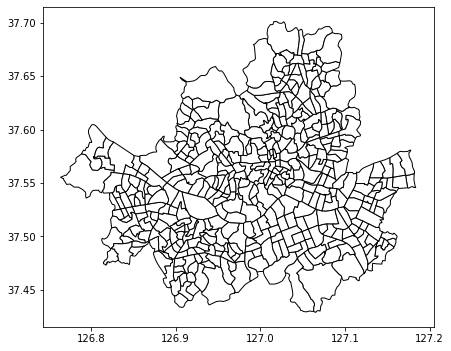

In [38]:
m.plot(color='white',edgecolor='black',figsize=(7,7))

In [39]:
data_foreigner.columns

Index(['?"기준일ID"', '시간대구분', '행정동코드', '집계구코드', '총생활인구수', '중국인체류인구수',
       '중국외외국인체류인구수'],
      dtype='object')

In [41]:
# gdata=gpd.GeoDataFrame(data_foreigner,geometry=gpd.points_from_xy(data_foreigner['경도'],data_foreigner['위도']))